#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Basic Data Exploration

In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
#descripe number of row and colume
df.shape

(148654, 13)

In [4]:
#descripe numbers of each column that have value and data dype of each one
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
#3descripe if row repeted or not
df.duplicated().sum()

0

In [7]:
#show each colume have nan value
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [8]:
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
Notes,148654,100.000000
Status,148654,100.000000
Benefits,36163,24.326961
BasePay,609,0.409676
OvertimePay,4,0.002691
OtherPay,4,0.002691
Id,0,0.000000
EmployeeName,0,0.000000
JobTitle,0,0.000000
TotalPay,0,0.000000


<Axes: >

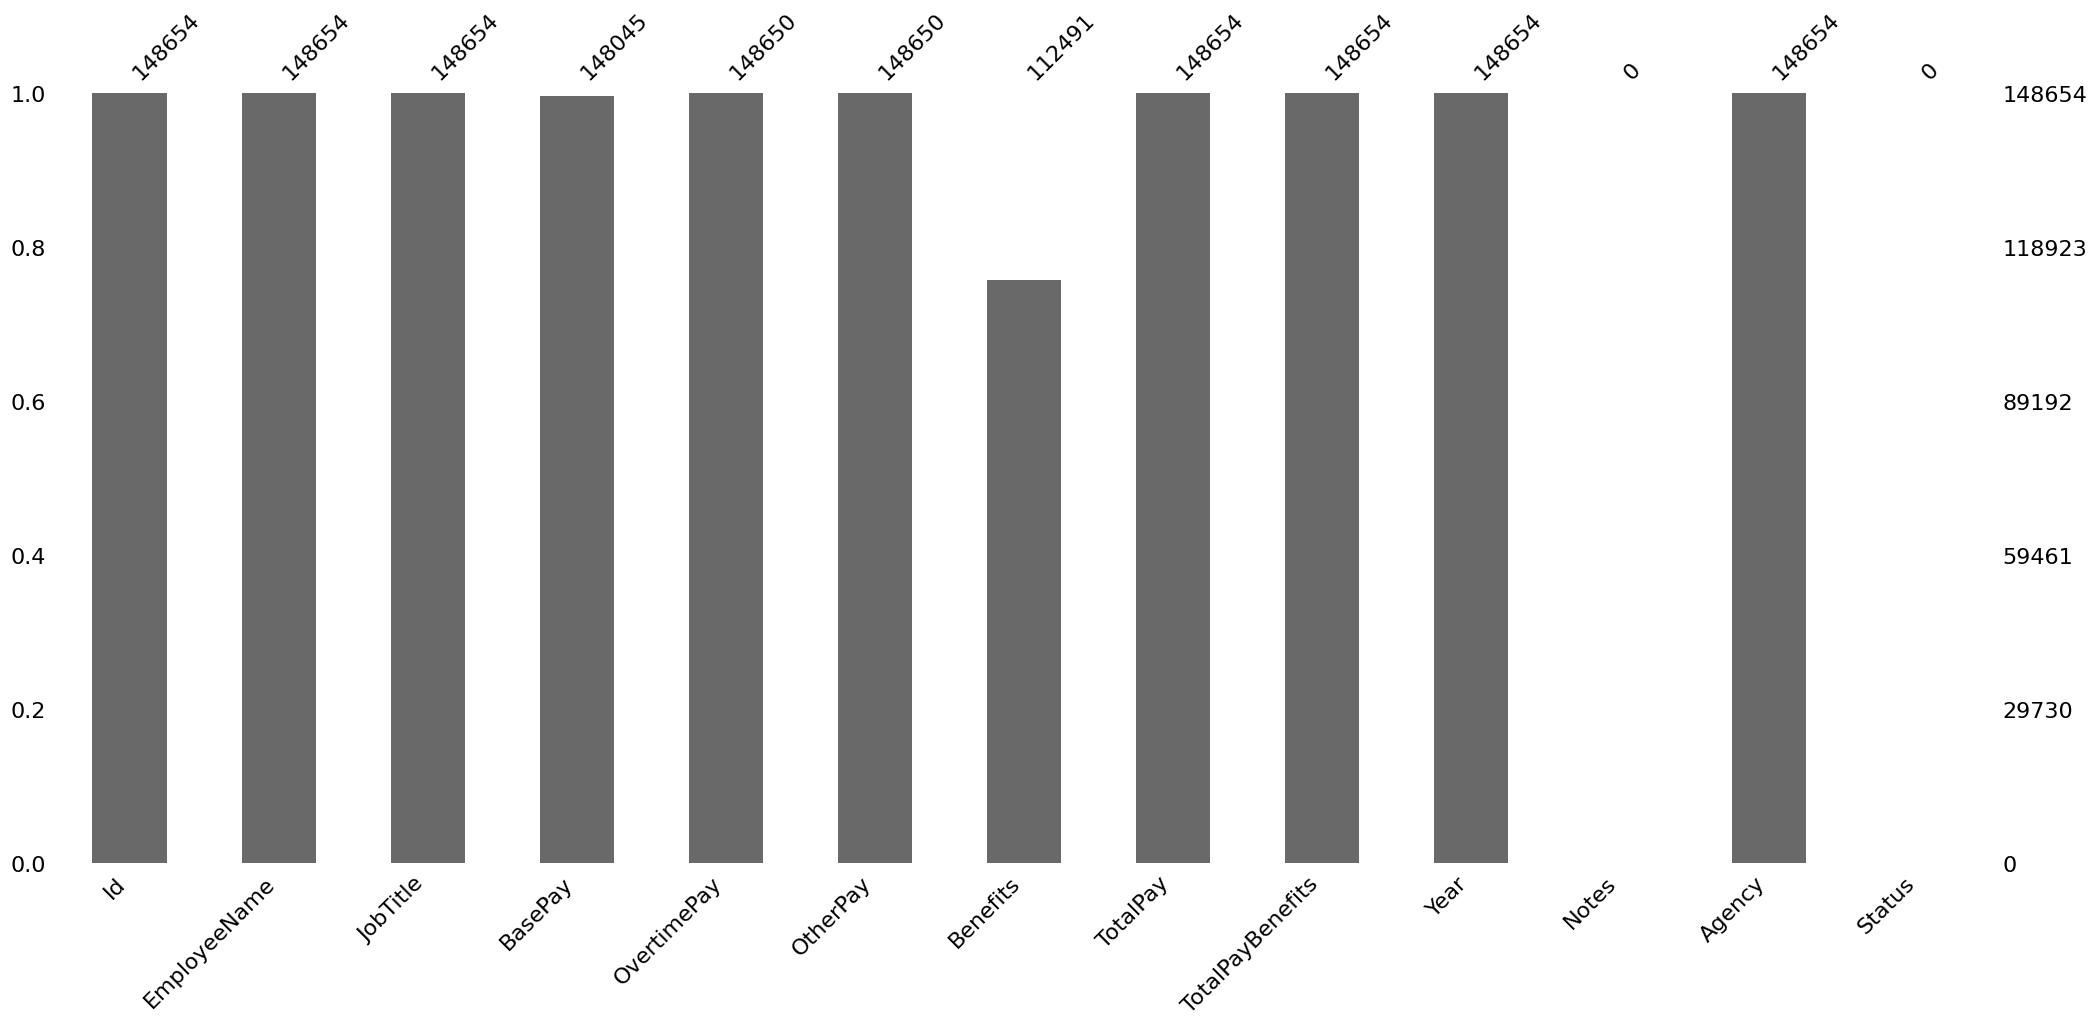

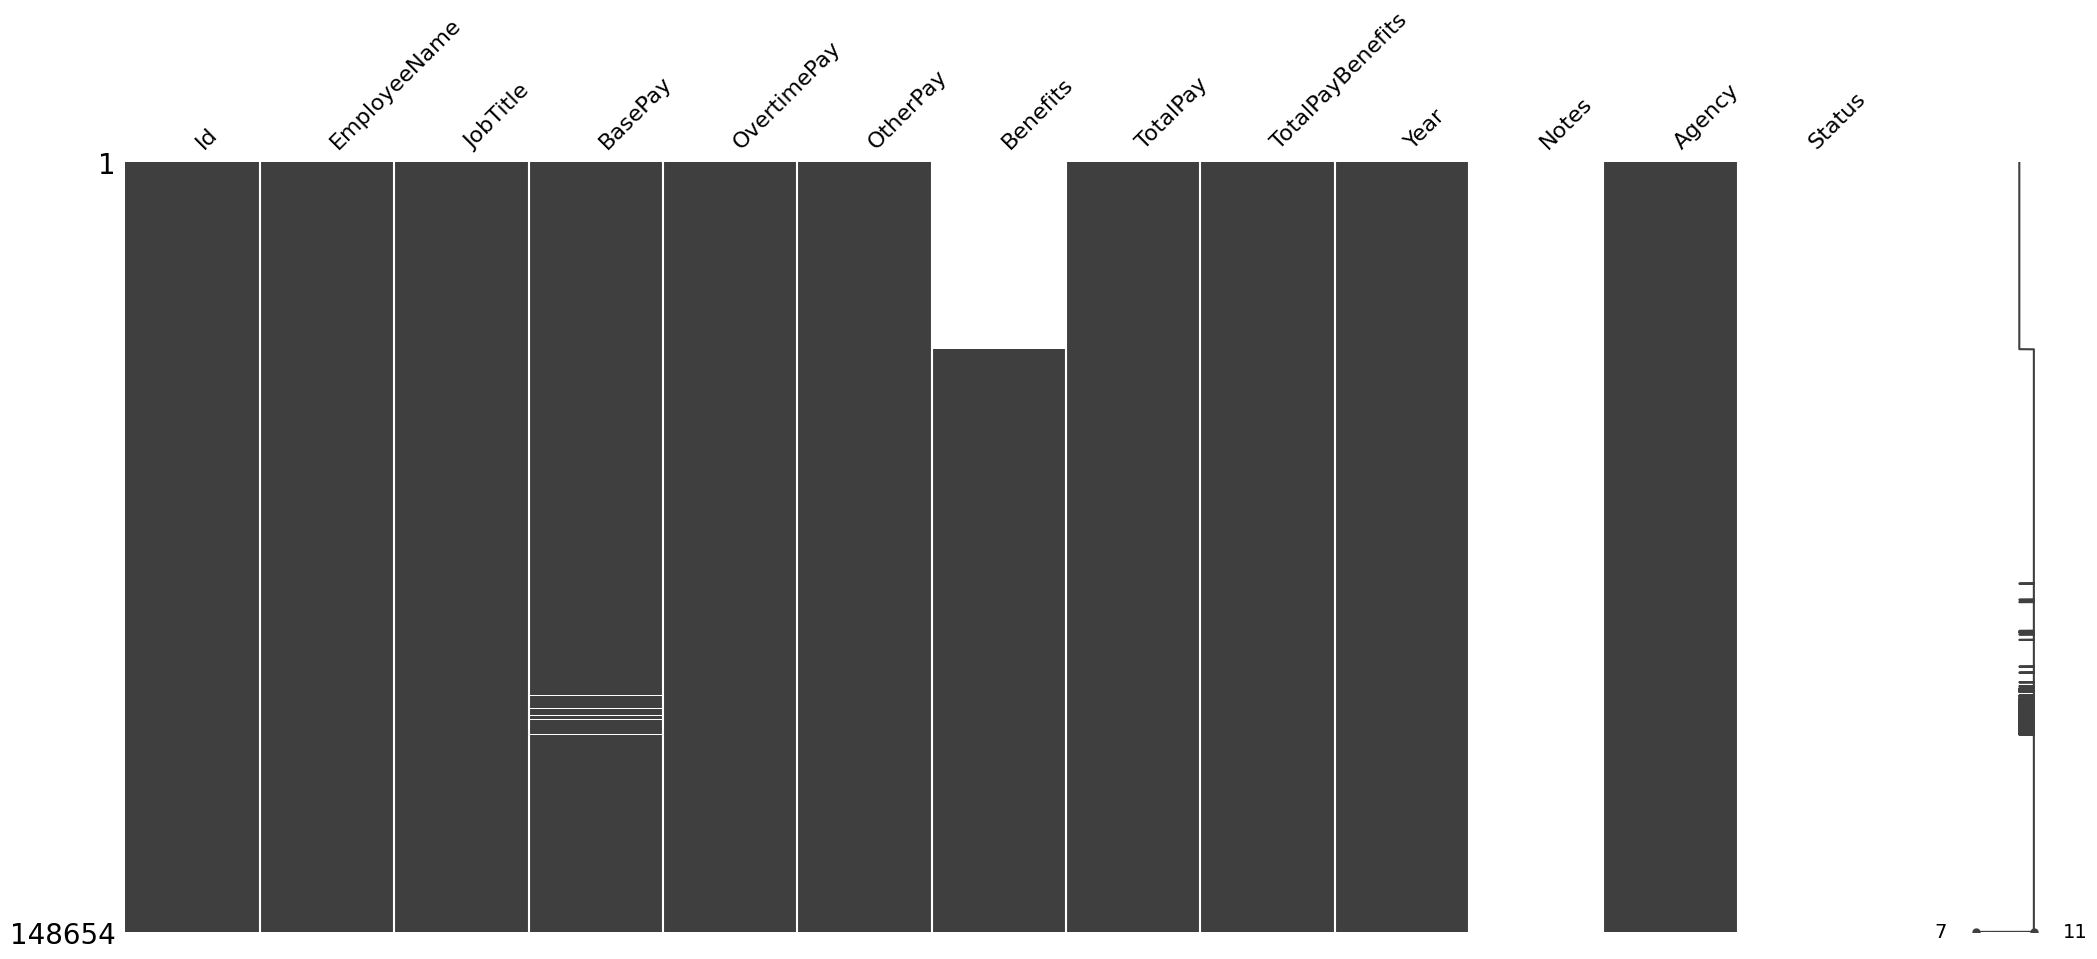

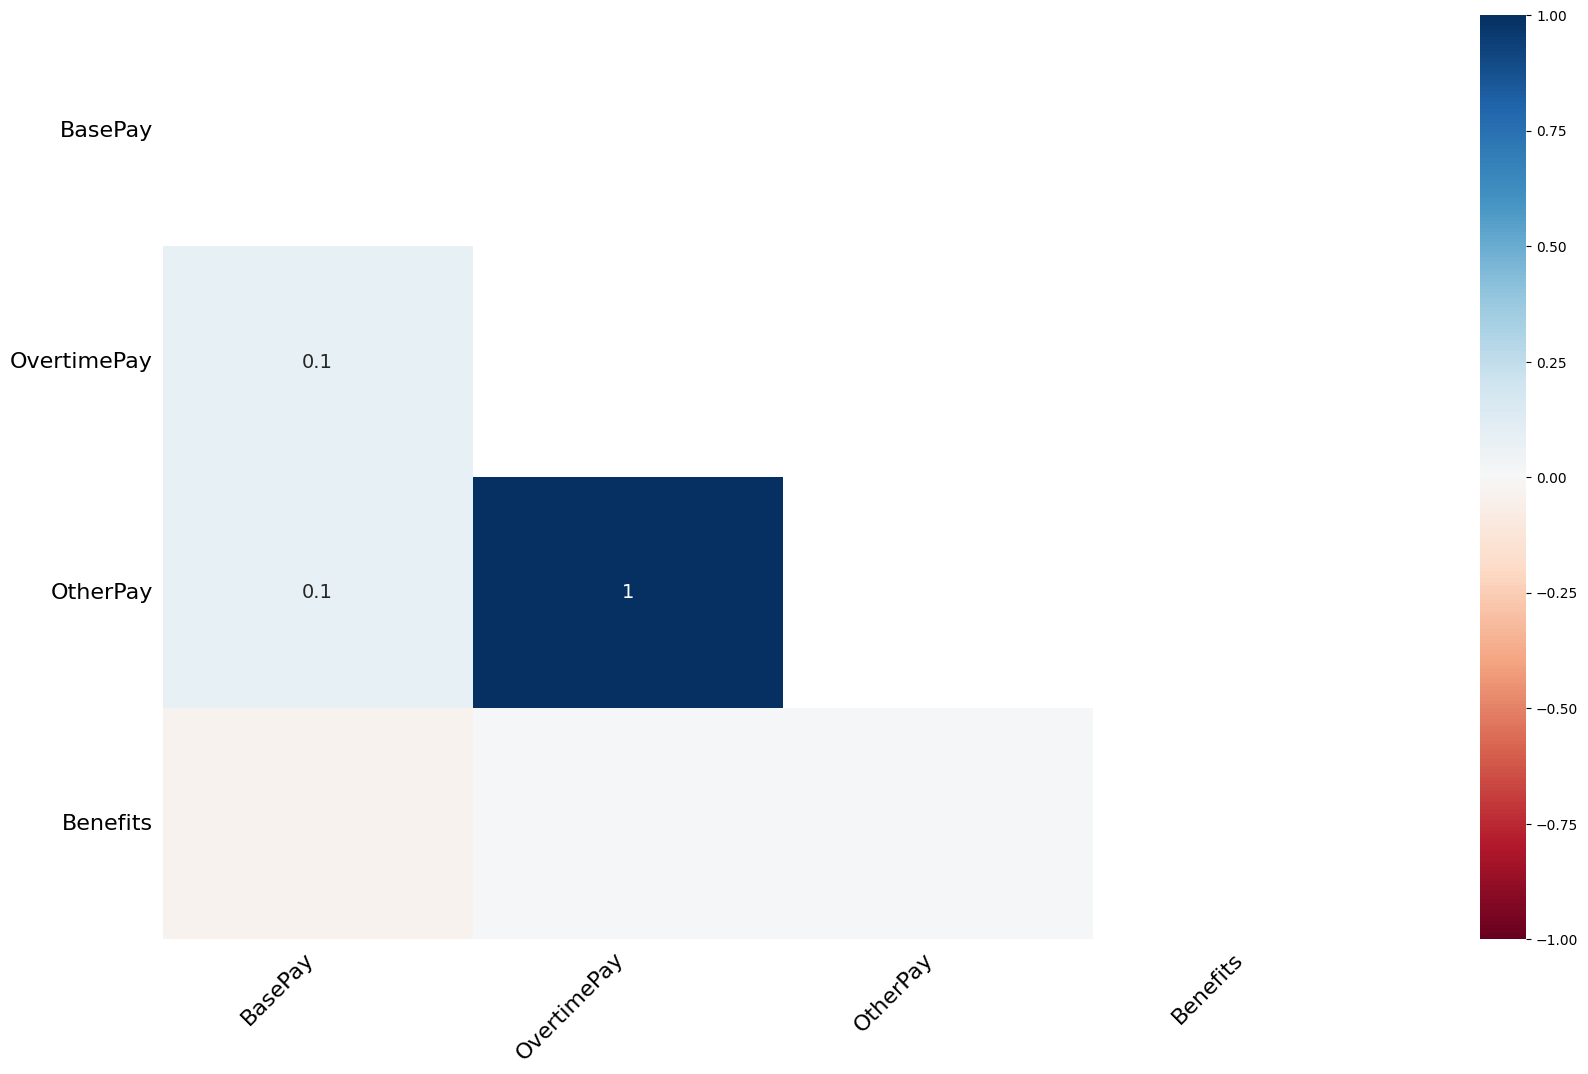

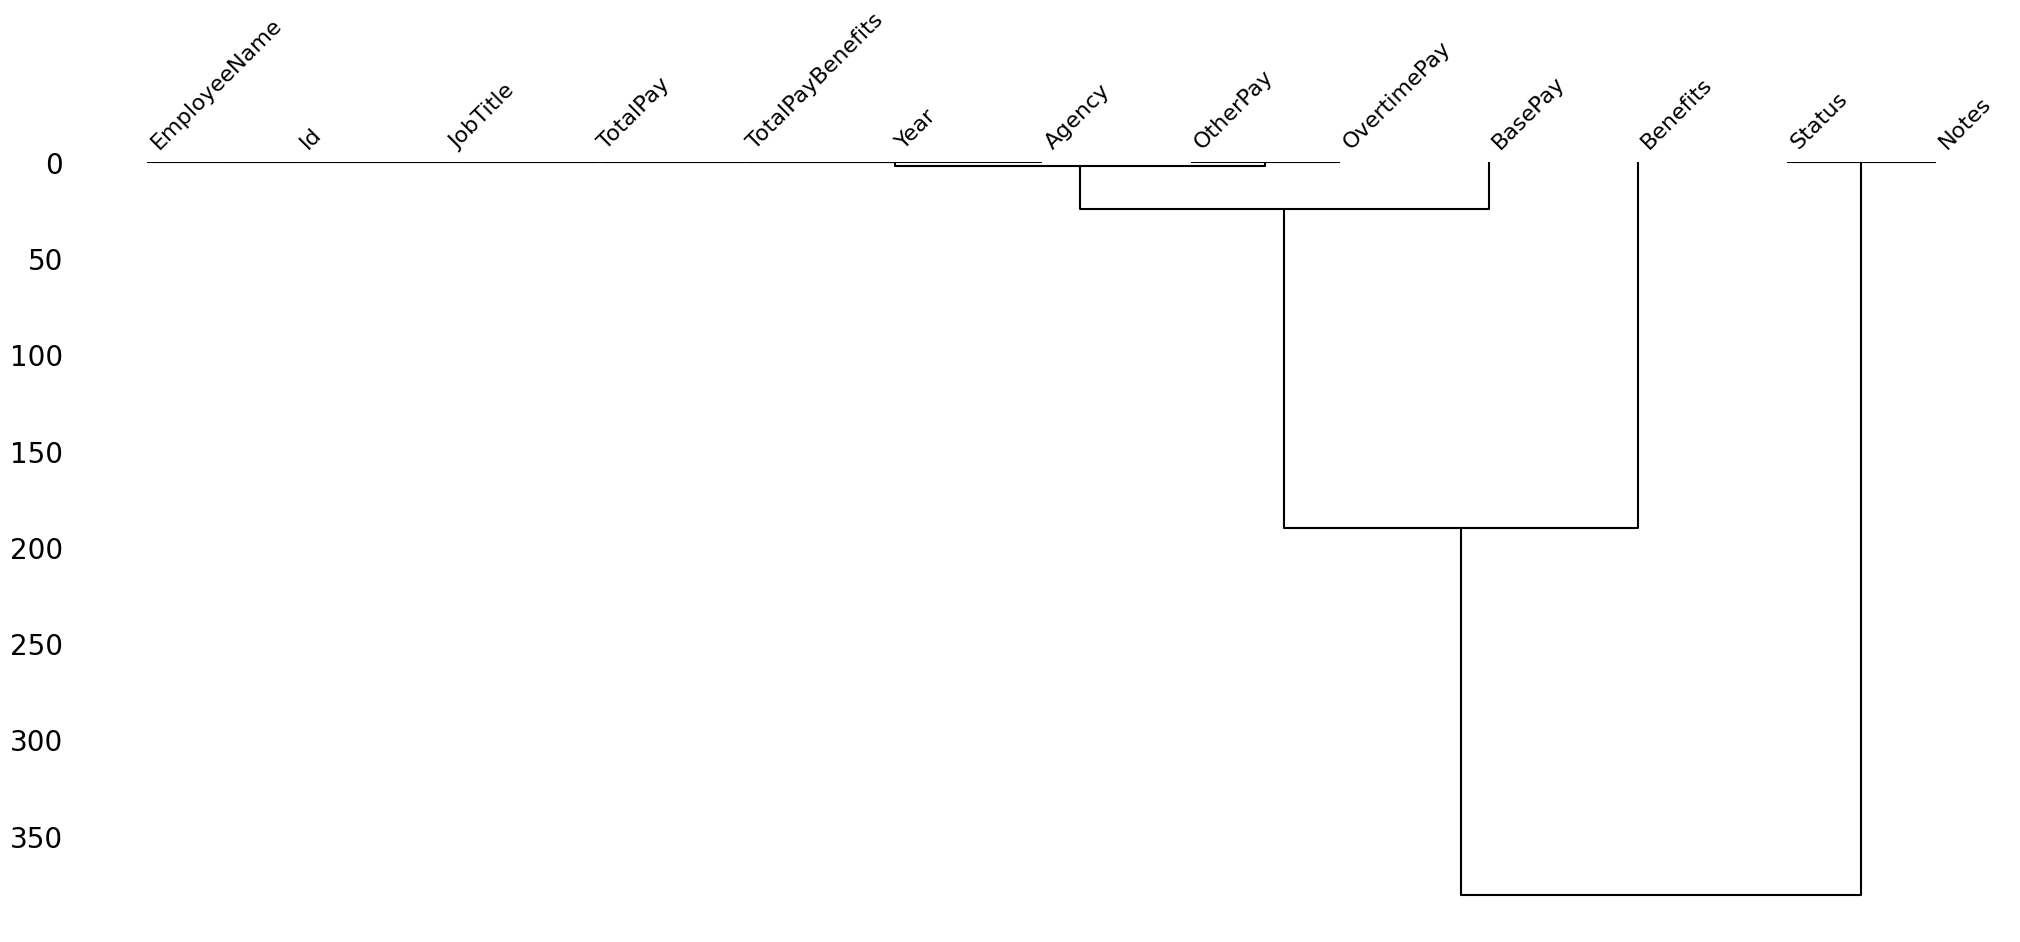

In [9]:
#show if data have missing value or not
msno.bar(df)
#yes we have missing values

#visualize missing values as a matrix
msno.matrix(df)

#heapmap for correlation analysis
msno.heatmap(df)

#dendrogram plot
msno.dendrogram(df)

# Descriptive Statistics

In [10]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


# Data Cleaning



 1.   delete 2 colume that have nan value and not help to analyse  
2.   some columes have nan value and fill it by 0 to calculate it



In [11]:
# delete two columns that have nan value
df=df.drop(['Notes','Status'],axis=1)

In [12]:
# df=df.dropna(subset = ['BasePay'])

In [13]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


In [14]:
df['BasePay'] = df['BasePay'].fillna(0)

In [15]:
# df['Benefits_1'] = df.apply(lambda x: x['TotalPayBenefits'] - x['TotalPay'], axis=1)
#fill nan value by 0
df=df.fillna(0)

In [16]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Basic Data Visualization



1.   histogram to show range of salary between emploee
2.  the top department have number of employee is Transit Operator





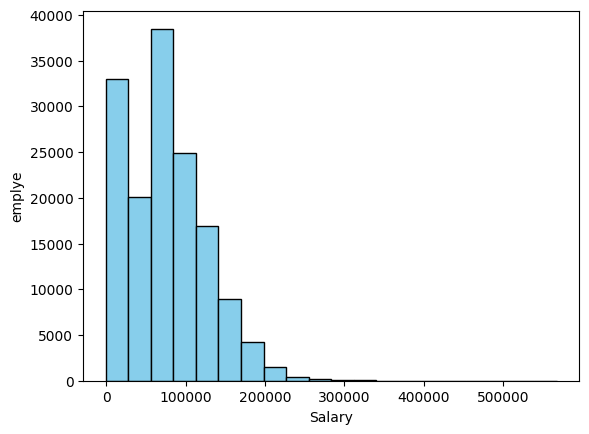

In [17]:
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('emplye')

# Display the plot
plt.show()

In [18]:
total = df['JobTitle'].value_counts()
total

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

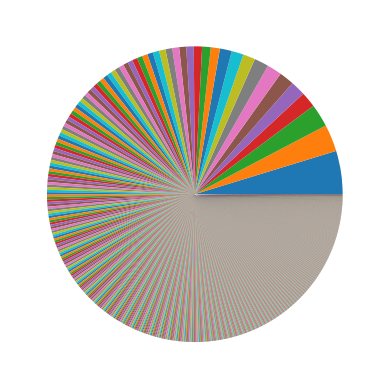

In [19]:
plt.pie(df['JobTitle'].value_counts())
plt.show()

# Grouped Analysis

In [20]:
#total of all salary in each year and which one is the most
df.groupby('Year')['TotalPay'].sum().astype('int64').sort_values(ascending=False)

Year
2013    2918655930
2014    2876910951
2012    2724848200
2011    2594195051
Name: TotalPay, dtype: int64

In [21]:
#total of basepay in each year and which one is the most
df.groupby('Year')['BasePay'].sum().astype('int64').sort_values(ascending=False)

Year
2013    2576380748
2014    2537369199
2012    2405834934
2011    2299566191
Name: BasePay, dtype: int64

In [22]:
#which department enter most income
df.groupby('JobTitle')['BasePay'].mean().astype('int64').sort_values(ascending=False)

JobTitle
Chief of Police                           309767
Chief, Fire Department                    304232
Gen Mgr, Public Trnsp Dept                297769
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262
Dep Dir for Investments, Ret              276153
                                           ...  
Public Safety Comm Tech                        0
Captain, (Fire Department)                     0
Cashier 3                                      0
RECREATION DIRECTOR                            0
Recreation Director                            0
Name: BasePay, Length: 2159, dtype: int64

In [23]:
#which department enter most salary
df.groupby('JobTitle')['TotalPay'].mean().astype('int64').sort_values(ascending=False)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211
Chief Investment Officer                          339653
Chief of Police                                   329183
Chief, Fire Department                            325971
DEPUTY DIRECTOR OF INVESTMENTS                    307899
                                                   ...  
Commissioner 16.700c, No Pay                          25
IS Technician Assistant                                0
Not provided                                           0
Public Safety Comm Tech                                0
Drug Court Coordinator                                 0
Name: TotalPay, Length: 2159, dtype: int64

In [24]:
#which department enter most salary TotalPayBenefits
df.groupby('JobTitle')['TotalPayBenefits'].mean().astype('int64').sort_values(ascending=False)

JobTitle
Chief Investment Officer                          436224
Chief of Police                                   411732
Chief, Fire Department                            408865
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211
Gen Mgr, Public Trnsp Dept                        380696
                                                   ...  
BOARD/COMMISSION MEMBER, GROUP III                   638
BdComm Mbr, Grp2,M=$25/Mtg                           475
BOARD/COMMISSION MEMBER, GROUP II                    296
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN              149
Not provided                                           0
Name: TotalPayBenefits, Length: 2159, dtype: int64

# Simple Correlation Analysis

In [25]:
keep_columns = ['OvertimePay', 'OtherPay', 'Benefits','TotalPay','TotalPayBenefits','Year'] # only looking at correlations between these variables
corr_matrix = df[keep_columns].corr()
corr_matrix

,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
OvertimePay,1.000000,0.316595,0.226173,0.504860,0.467984,0.027870
OtherPay,0.316595,1.000000,0.160344,0.470499,0.422345,-0.002515
Benefits,0.226173,0.160344,1.000000,0.632202,0.781963,0.461408
TotalPay,0.504860,0.470499,0.632202,1.000000,0.977313,0.032090
TotalPayBenefits,0.467984,0.422345,0.781963,0.977313,1.000000,0.151947
Year,0.027870,-0.002515,0.461408,0.032090,0.151947,1.000000


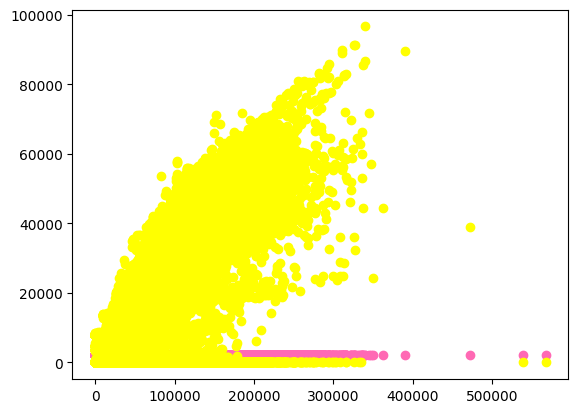

In [28]:
plt.scatter(df['TotalPay'], df['Year'], color = 'hotpink')
plt.scatter(df['TotalPay'], df['Benefits'],color='yellow')
plt.show()

# Good Luck!